<a href="https://colab.research.google.com/github/kohoto/2d_history_match/blob/master/BayesianOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install bayesian-optimization

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  82.41    | -2.562    |  3.133    |
|  2        | -45.68    |  4.955    | -3.315    |
|  3        | -1.241    | -4.765    | -2.139    |
|  4        |  115.4    | -2.773    | -2.662    |
|  5        |  23.57    |  4.167    |  2.336    |
|  6        |  116.6    | -2.778    | -2.766    |
|  7        |  89.07    | -1.079    | -3.032    |
|  8        |  12.87    | -1.188    |  0.1668   |
|  9        | -81.44    | -4.745    |  4.0      |
|  10       |  19.62    | -0.854    |  3.713    |
|  11       |  50.25    | -2.069    | -4.0      |
|  12       |  80.42    | -1.675    | -1.993    |
|  13       |  78.56    |  0.6958   | -2.667    |
|  14       |  20.64    |  0.4112   | -3.997    |
|  15       |  36.55    |  1.499    | -1.141    |
|  16       |  69.09    | -2.881    |  1.718    |
|  17       |  39.2     | -3.833    | -4.0      |
|  18       |  54.73    | -0.2393   | -1.886    |


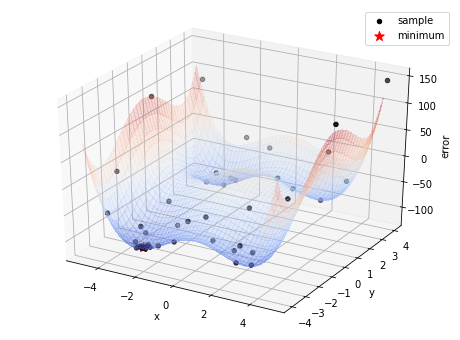

In [52]:
from matplotlib import pyplot as plt
import numpy as np
from bayes_opt import BayesianOptimization

# input
x_bound = (-5.0, 5.0)
y_bound = (-4.0, 4.0)
init_points = 1
n_iter = 50

# figure settings
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('error')


# Styblinski-Tang function (2D)
def f(x, y):
    return 0.5 * (x**4 - 16 * x**2 + 5 * x) + (y**4 - 16 * y**2 + 5 * y)

# 
def f_minimize(x, y):
  return -1 * f(x, y)

# Plot true function
xs = [x for x in np.arange(x_bound[0], x_bound[1], 0.1)]
ys = [y for y in np.arange(y_bound[0], y_bound[1], 0.1)]
xs, ys = np.meshgrid(xs, ys)
surf = ax.plot_surface(xs, ys, f(xs, ys), alpha=0.2, cmap=plt.cm.coolwarm,
                  linewidth=0, antialiased=False)

# 最適化するパラメータの下限・上限 (xのみ)
pbounds = {
    'x': x_bound, 'y': y_bound
}

# optimization parameters (-f is because BayesianOptimization only has maximize function)
optimizer = BayesianOptimization(f=f_minimize, pbounds=pbounds)
# optimization
optimizer.maximize(init_points=init_points, n_iter=n_iter)

# Plot sample points
n_samples = len(optimizer.res)
sample_xs = [optimizer.res[p]['params']['x'] for p in range(n_samples)]
sample_ys = [optimizer.res[p]['params']['y'] for p in range(n_samples)]
sample_fs = [-1 * optimizer.res[p]['target'] for p in range(n_samples)]
ax.scatter(sample_xs,sample_ys, sample_fs, c='black', s=20, zorder=10, label='sample')
# Plot scatter at the minimum
ax.scatter(optimizer.max['params']['x'], optimizer.max['params']['y'], -1 * optimizer.max['target'], c='red', s=100, zorder=20, marker="*", label='minimum')
ax.legend()
print(optimizer.max)
